# Домашнее задание к лекции "Визуализация данных"
Обязательная часть
Вам необходимо провести базовый EDA выбранного набора данных.
Требования к анализу:
построить не менее 4 визуализаций различных видов;
каждая визуализация должным образом оформлена и читается даже в отрыве от контекста;
по каждой визуализации необходимо написать вывод (какую гипотезу на ее основе можно выдвинуть?).

Откуда брать данные?
Можете взять свои рабочие данные, либо найти открытые данные (например, на kaggle.com) по интересующей вас предметной области (тогда не забудьте их выложить на github вместе с ноутбуком). Если идей нет, можете взять один из перечисленных ниже:

данные приложений из Google Play;
данные о видео из трендов YouTube;
данные об уровне счастья в разных странах;
данные по фильмам и сериалам Netflix.


In [4]:
import pandas as pd
import matplotlib.pyplot as plt

In [90]:
df=pd.read_csv('MoviesOnStreamingPlatforms_updated.csv')
df.head()

,Unnamed: 0,ID,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Type,Directors,Genres,Country,Language,Runtime
0,0,1,Inception,2010,13+,8.8,87%,1,0,0,0,0,Christopher Nolan,"Action,Adventure,Sci-Fi,Thriller","United States,United Kingdom","English,Japanese,French",148.0
1,1,2,The Matrix,1999,18+,8.7,87%,1,0,0,0,0,"Lana Wachowski,Lilly Wachowski","Action,Sci-Fi",United States,English,136.0
2,2,3,Avengers: Infinity War,2018,13+,8.5,84%,1,0,0,0,0,"Anthony Russo,Joe Russo","Action,Adventure,Sci-Fi",United States,English,149.0
3,3,4,Back to the Future,1985,7+,8.5,96%,1,0,0,0,0,Robert Zemeckis,"Adventure,Comedy,Sci-Fi",United States,English,116.0
4,4,5,"The Good, the Bad and the Ugly",1966,18+,8.8,97%,1,0,1,0,0,Sergio Leone,Western,"Italy,Spain,West Germany",Italian,161.0


In [91]:
df=df[['Title','Year','Age','IMDb','Directors','Genres', 'Runtime']].fillna(0)
df.head()

,Title,Year,Age,IMDb,Directors,Genres,Runtime
0,Inception,2010,13+,8.8,Christopher Nolan,"Action,Adventure,Sci-Fi,Thriller",148.0
1,The Matrix,1999,18+,8.7,"Lana Wachowski,Lilly Wachowski","Action,Sci-Fi",136.0
2,Avengers: Infinity War,2018,13+,8.5,"Anthony Russo,Joe Russo","Action,Adventure,Sci-Fi",149.0
3,Back to the Future,1985,7+,8.5,Robert Zemeckis,"Adventure,Comedy,Sci-Fi",116.0
4,"The Good, the Bad and the Ugly",1966,18+,8.8,Sergio Leone,Western,161.0


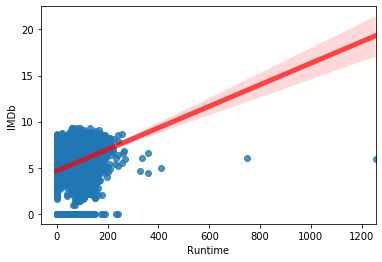

In [133]:
#строим график зависимости рейтинга фильма от продолжительности
sns.regplot(x=df.Runtime, y=df.IMDb, line_kws={'color':'r','alpha':0.7,'lw':5})

In [ ]:
#1)видим выбросы
#Вывод: 1)уточнить достоверность данных
#2) удалить выбросы и построить чистый график

In [134]:
#убираем выбросы
df2_new=df[~df['Runtime'].isin(df.Runtime.nlargest(2))]
df2_new

,Title,Year,Age,IMDb,Directors,Genres,Runtime
0,Inception,2010,13+,8.8,Christopher Nolan,"Action,Adventure,Sci-Fi,Thriller",148.0
1,The Matrix,1999,18+,8.7,"Lana Wachowski,Lilly Wachowski","Action,Sci-Fi",136.0
2,Avengers: Infinity War,2018,13+,8.5,"Anthony Russo,Joe Russo","Action,Adventure,Sci-Fi",149.0
3,Back to the Future,1985,7+,8.5,Robert Zemeckis,"Adventure,Comedy,Sci-Fi",116.0
4,"The Good, the Bad and the Ugly",1966,18+,8.8,Sergio Leone,Western,161.0
...,...,...,...,...,...,...,...
16739,The Ghosts of Buxley Hall,1980,0,6.2,Bruce Bilson,"Comedy,Family,Fantasy,Horror",120.0
16740,The Poof Point,2001,7+,4.7,Neal Israel,"Comedy,Family,Sci-Fi",90.0
16741,Sharks of Lost Island,2013,0,5.7,Neil Gelinas,Documentary,0.0
16742,Man Among Cheetahs,2017,0,6.6,Richard Slater-Jones,Documentary,0.0


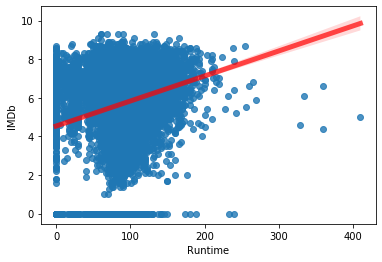

In [136]:

sns.regplot(x=df2_new.Runtime, y=df2_new.IMDb, line_kws={'color':'r','alpha':0.7,'lw':5})

In [ ]:
#Вывод : существует корреляция положительная между продолжительностью фильма и оценкой

In [127]:
#Строим график распределния количества фильмов по годам выпуска
df5=df.groupby(['Year']).count().sort_values(by='Year',ascending=False).reset_index()
df5

,Year,Title,Age,IMDb,Directors,Genres,Runtime
0,2020,147,147,147,147,147,147
1,2019,689,689,689,689,689,689
2,2018,1285,1285,1285,1285,1285,1285
3,2017,1401,1401,1401,1401,1401,1401
4,2016,1206,1206,1206,1206,1206,1206
...,...,...,...,...,...,...,...
104,1916,1,1,1,1,1,1
105,1915,4,4,4,4,4,4
106,1913,2,2,2,2,2,2
107,1912,1,1,1,1,1,1


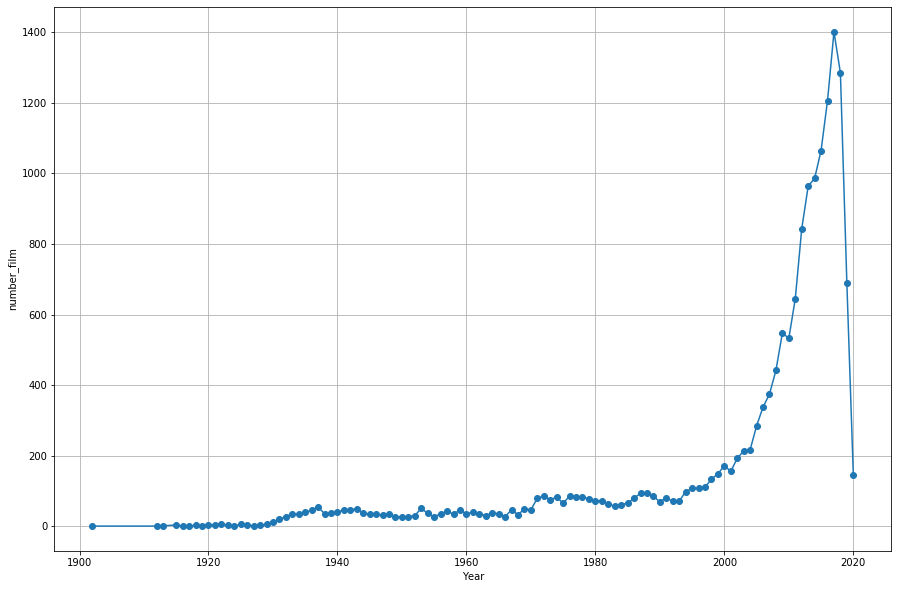

In [132]:
plt.figure(figsize=(15,10))
plt.plot(df5['Year'], df5['Title'], 'o-')
plt.xlabel('Year')
plt.ylabel('number_film')
plt.grid()

In [ ]:
#Вывод:
#1) больший интерес и количество у современных фильмов  выпуска с 2000 по 2019г
#2) до 2000 г интерес к фильмам примерно одинаковый
#3) предположительно (гипотеза которую надо проверить) после 2019 г новые фильмы не выходили

In [97]:
import seaborn as sns

In [124]:
df3=df.sort_values(by='Year',ascending=False)
rec=df3['Year'].unique()[:10]
df4=df3[df3.Year.isin(rec)]

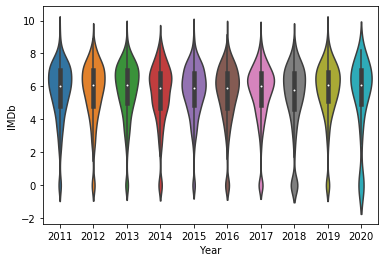

In [125]:
#построим распределние рейтингов по годам (берем выборку последних n лет). Цель - посмотреть !) какие числовые значения предпочитают
#пользователи, где сконцентрированы оценки
#2) наиболее успешные годы для кинемотографа
#3)средняя оценка по годам
# из графиков видно стабильное распределение оценок, но при этом постоянный небольшой рост минимальных оценок
# рост числа низких оценок. с 2011 г по 2020 г наблюдается сужение внутриквартильного расстояния, что говорит о консолидации
#зрителей вокруг среднего значения
#Вывод - снижение качества фильмов
aix=sns.violinplot(x=df4.Year, y=df4.IMDb)

In [94]:
#график распределения количества фильмов по возрастным категриям
#Цель - понять аудиторию
df1=df[['Age','Title']].groupby(['Age']).count().sort_values(by='Title', ascending=False).reset_index()
df1.loc[0,'Age']='undifinde'
df1

,Age,Title
0,undifinde,9390
1,18+,3474
2,7+,1462
3,13+,1255
4,all,843
5,16+,320


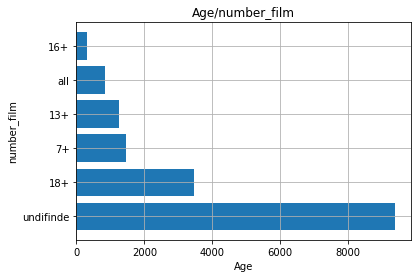

In [96]:
plt.barh(df1['Age'], df1['Title'])
plt.xlabel('Age')
plt.ylabel('number_film')
plt.title('Age/number_film')
plt.grid()

In [ ]:
#Вывод:
#    1)видим что больше половины всех фильмов находятся в неизвестной возрастной группе, отсюда две задачи
#   - маркетологам найти данные по распределнию данных фильмов 
#    - аналитику - используя существующие данные по возрастным категориям и фильмам распределить 
#    данные фильмы по категориям
#   - затем сравнить